In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pickle
import matplotlib.pyplot as plt
import numpy as np
import re
import copy

In [8]:

# inputs = [['v1_9/5_epoch', '512-512 fc layers'], 
#           ['v1_10/10_epoch', '512-1024-512 fc layers'], 
#           ['v1_11/10_epoch', '512-1024-2048-1024-512 fc layers']]

inputs_accent_classification_change_fc_layers = [['../../accent_classification/letters/v2_0/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2)'],
                                                ['../../accent_classification/letters/v2_1/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.3)'],
                                                ['../../accent_classification/letters/v2_2/40_epoch', '115(3)-46(3):512(0.3)-256(0.3)-256(0.3)'],]


inputs_accent_classification = [['../../accent_classification/letters/60_epoch', '43(3):256-512-256']]


inputs_word_accetuation_comparison = [['../syllables/v1_0/10_epoch', '43(3):256-512-256'], 
                                      ['../syllables/v2_0/40_epoch', '160(2):256-256-256'], 
                                      ['../syllabled_letters/v1_0/40_epoch', '44(3):256-512-256'],
                                      ['../syllabled_letters/v2_5_3/40_epoch', '200(2):256-256-256'],
                                      ['v3_2/60_epoch', '69(3)-46(3):256-512-256'],
                                      ['v4_1/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2) without length'],
                                     ]


inputs_syllabled_letters = [['../syllabled_letters/v1_0/40_epoch', '44(3):256-512-256'], 
                          ['../syllabled_letters/v1_1/40_epoch', '66(3):256-512-256']]

inputs_syllabled_letters_different_convolutions = [#['../syllabled_letters/v2_0/40_epoch', '40(2):256-256-256'], 
#                                                     ['../syllabled_letters/v2_1/40_epoch', '60(2):256-256-256'], 
#                                                     ['../syllabled_letters/v2_2/40_epoch', '80(2):256-256-256'], 
#                                                    ['../syllabled_letters/v2_3/40_epoch', '100(2):256-512-256'], 
                                                    ['../syllabled_letters/v2_4/40_epoch', '120(2):256-256-256'], 
                                                    ['../syllabled_letters/v2_5/40_epoch', '140(2):256-256-256'],
                                                    ['../syllabled_letters/v2_5_1/40_epoch', '160(2):256-256-256'],
                                                    ['../syllabled_letters/v2_5_2/40_epoch', '180(2):256-256-256'],
                                                    ['../syllabled_letters/v2_5_3/40_epoch', '200(2):256-256-256'],
                                                    #['../syllabled_letters/v2_5_4/40_epoch', '220(2):256-256-256'],
                                                    # ['../syllabled_letters/v2_5_3/40_epoch', '140(2):256-256-256'],
#                                                     ['../syllabled_letters/v2_6/40_epoch', '40(3):256-256-256'], 
#                                                     ['../syllabled_letters/v2_7/40_epoch', '60(3):256-256-256'], 
#                                                     ['../syllabled_letters/v2_8/40_epoch', '80(3):256-256-256'], 
#                                                     ['../syllabled_letters/v2_9/40_epoch', '100(3):256-512-256'], 
#                                                     ['../syllabled_letters/v2_10/40_epoch', '120(3):256-256-256'], 
###                                                    #['../syllabled_letters/v2_11/40_epoch', '140(3):256-256-256'],
                                                    # ['../syllabled_letters/v2_11_1/40_epoch', '160(3):256-256-256'],
                                                    #['../syllabled_letters/v2_11_2/40_epoch', '180(3):256-256-256'],
                                                    #['../syllabled_letters/v2_11_3/40_epoch', '200(3):256-256-256']#,
#                                                     ['../syllabled_letters/v2_12/40_epoch', '40(4):256-256-256'], 
#                                                     ['../syllabled_letters/v2_13/40_epoch', '60(4):256-256-256'], 
#                                                     ['../syllabled_letters/v2_14/40_epoch', '80(4):256-256-256'], 
#                                                     ['../syllabled_letters/v2_15/40_epoch', '100(4):256-512-256']
                                                  ]


inputs_syllables_different_convolution = [['../syllables/v2_0/40_epoch', '160(2):256-256-256'], 
                                          ['../syllables/v2_1/40_epoch', '180(2):256-256-256'],
                                          ['../syllables/v2_2/40_epoch', '200(2):256-256-256'],
                                          ['../syllables/v2_3/40_epoch', '220(2):256-256-256']]


inputs_syllables = [['../syllables/v1_0/10_epoch', '43(3):256-512-256'], 
                          ['../syllables/v1_1/20_epoch', '22(2)-22(2):256-512-256'],
                          ['../syllables/v1_2/20_epoch', '44(2)-44(2):256-512-256']]


inputs_best_improvements = [['v1_16/40_epoch', '43(3)-43(3):256-512-256 not reversed, multex v3, no additional settings'],
                          ['v2_4/40_epoch', '69(3)-46(3):256-512-256 not reversed, multex v4, no additional settings'], 
                          ['v3_2/60_epoch', '69(3)-46(3):256-512-256 reversed, multex v4, additional settings']]

inputs_testing_with_length = [#['v3_7/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2) without length'],
                              #['v4_0/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2) with length'],
                              ['v4_1/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2) without length'],
                              ['v4_2/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2) with length'],
                             ]


inputs_testing_different_dropouts = [['v3_7/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.2)'],
#                                      ['v3_8/40_epoch', '115(3)-46(3):256(0.4)-256(0.4)-256(0.2)'],
#                                      ['v3_9/40_epoch', '115(3)-46(3):256(0.4)-256(0.3)-256(0.2)'],
                                     ['v3_10/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.3)'],
                                     ['v3_11/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.4)']#,
#                                      ['v3_12/40_epoch', '115(3)-46(3):256(0.4)-256(0.3)-256(0.4)'],
#                                      ['v3_13/40_epoch', '115(3)-46(3):256(0.4)-256(0.4)-256(0.4)'],
#                                      ['v3_14/40_epoch', '115(3)-46(3):256(0.3)-256(0.4)-256(0.4)'],
#                                      ['v3_15/40_epoch', '115(3)-46(3):256(0.3)-256(0.3)-256(0.5)'],
#                                      ['v3_16/40_epoch', '115(3)-46(3):256(0.3)-256(0.4)-256(0.5)'],
#                                      ['v3_17/40_epoch', '115(3)-46(3):256(0.5)-256(0.4)-256(0.5)']
                                    ]


inputs_testing_different_fc_layers = [['v3_3/60_epoch', '115(3)-46(3):256-512-256'],
                                     ['v3_7/40_epoch', '115(3)-46(3):256-256-256']]


inputs_best_convolution_2 = [#['v3_0/60_epoch', '69(3)-46(3):256-512-256'], 
#                           ['v3_1/60_epoch', '92(3)-46(3):256-512-256'], 
#                           ['v3_2/60_epoch', '69(3)-46(3):256-512-256 smaller y'],
                          ['v3_3/60_epoch', '115(3)-46(3):256-512-256 smaller y'],
#                           ['v3_4/60_epoch', '115(3)-69(3):256-512-256 smaller y'],
#                           ['v3_5/60_epoch', '133(3)-69(3):256-512-256 smaller y'],
                          ['v3_6/60_epoch', '133(3)-46(3):256-512-256 smaller y']]


inputs_best_convolution = [['v2_0/40_epoch', '43(3)-43(3):256-512-256'], 
                          ['v2_1/40_epoch', '23(3)-23(3):256-512-256'], 
                          ['v2_2/40_epoch', '46(3)-23(3):256-512-256'],
                          ['v2_3/40_epoch', '23(3)-46(3):256-512-256'],
                          ['v2_4/40_epoch', '69(3)-46(3):256-512-256'],
                          ['v2_5/40_epoch', '46(3)-69(3):256-512-256'],
                          ['v2_6/40_epoch', '69(3)-23(3):256-512-256']]


inputs_best_architecture = [['v1_14/40_epoch', '512-1024-512 fc layers'], 
          ['v1_15/30_epoch', '512-1024-2048-1024-512 fc layers'], 
          ['v1_16/40_epoch', '256-512-256 fc layers'],
          ['v1_17/40_epoch', '128-256-128 fc layers'],
          ['v1_18/60_epoch', '64-128-64 fc layers']]

inputs_with_and_without_additional_attributes = [['test_without_additional_attributes/40_epoch', 'without additional attributes'], 
                                                 ['test_with_additional_attributes/40_epoch', 'with additional attributes']]

inputs = inputs_best_architecture

LETTER TYPE ASIGNMENT: Comparison of different fc layers.


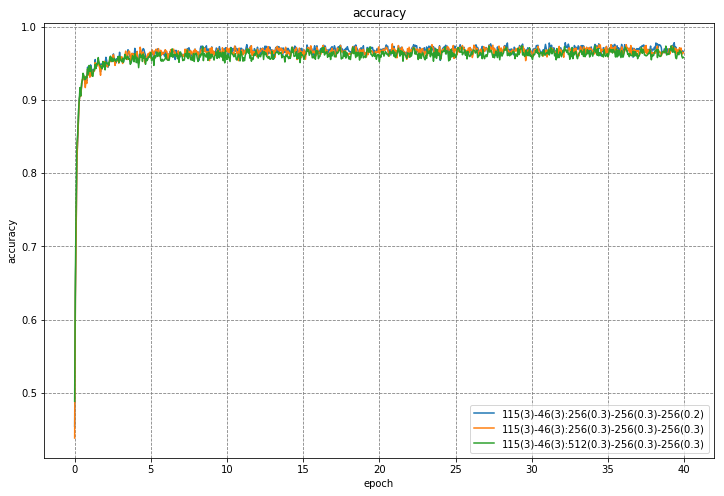

In [9]:
print('LETTER TYPE ASIGNMENT: Comparison of different fc layers.')
draw_plots(inputs_accent_classification_change_fc_layers, epoch_number=40, validation_data=True)

TYPES COMPARISON: Comparison of different convolutions.


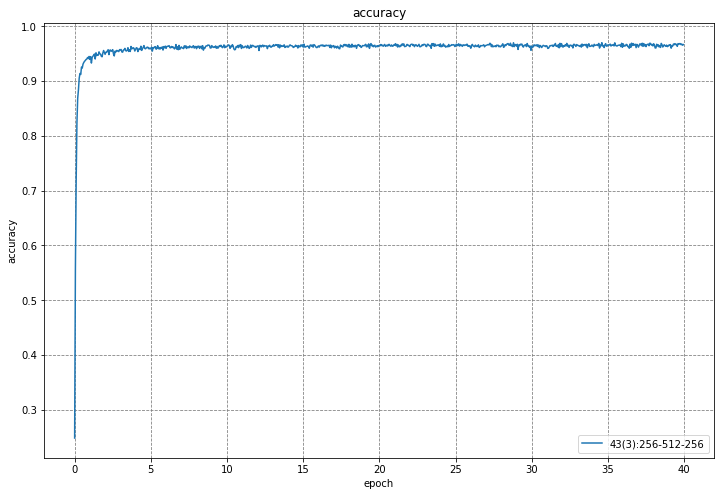

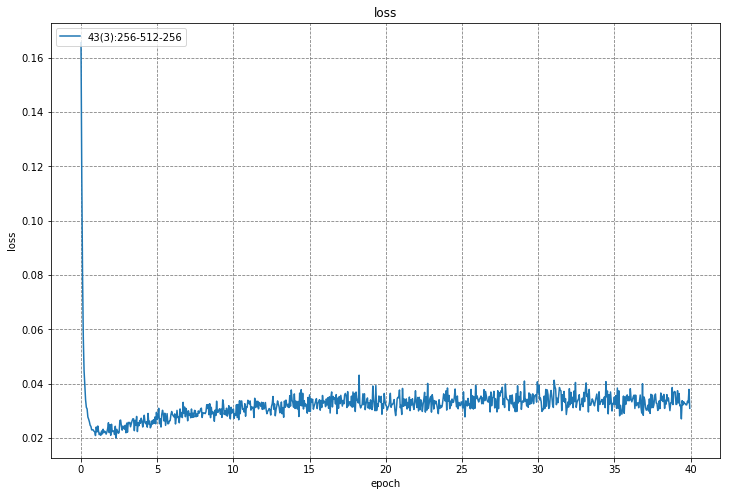

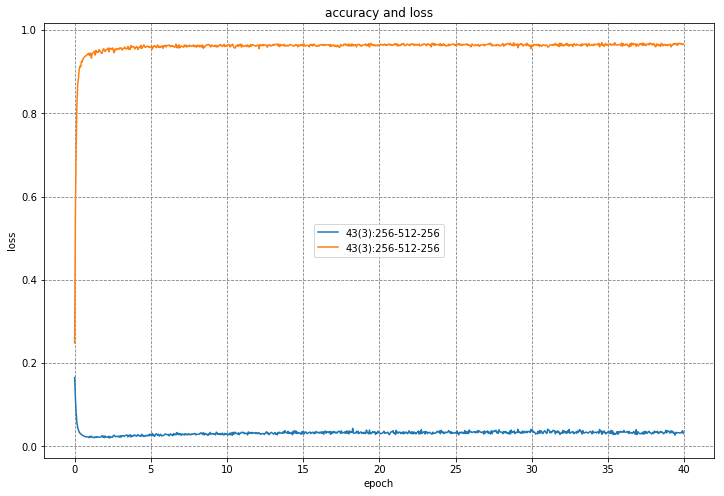

In [64]:
print('TYPES COMPARISON: Comparison of different convolutions.')
draw_plots(inputs_accent_classification, epoch_number=40, validation_data=True, accuracy_only=False)

TYPES COMPARISON: Comparison of different convolutions.


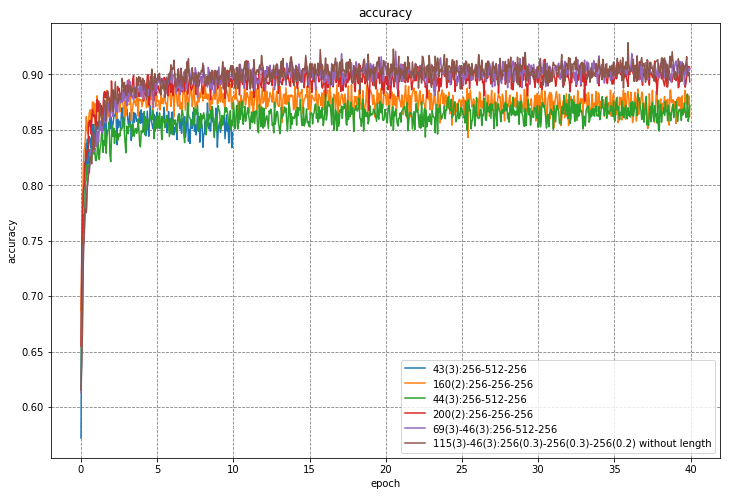

In [18]:
print('TYPES COMPARISON: Comparison of different convolutions.')
draw_plots(inputs_word_accetuation_comparison, epoch_number=40, validation_data=True)

SYLLABLED LETTERS REPRESENTATION: Comparison of different convolutions.


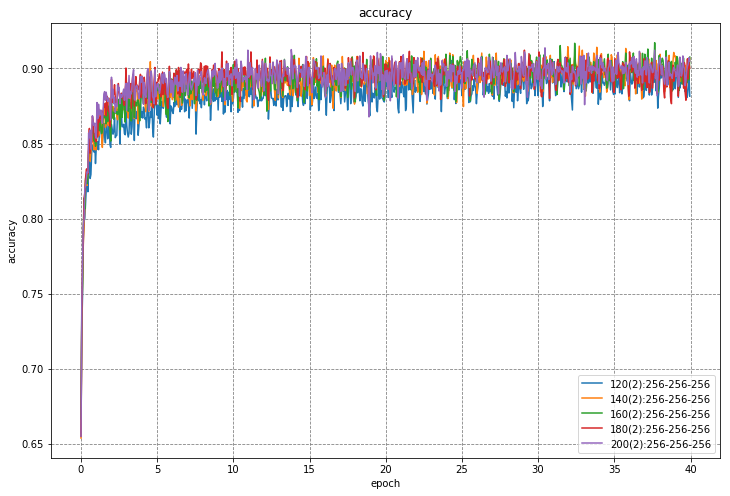

In [16]:
print('SYLLABLED LETTERS REPRESENTATION: Comparison of different convolutions.')
draw_plots(inputs_syllabled_letters_different_convolutions, epoch_number=40, validation_data=True)

SYLLABLED LETTERS REPRESENTATION: Comparison of different convolutions.


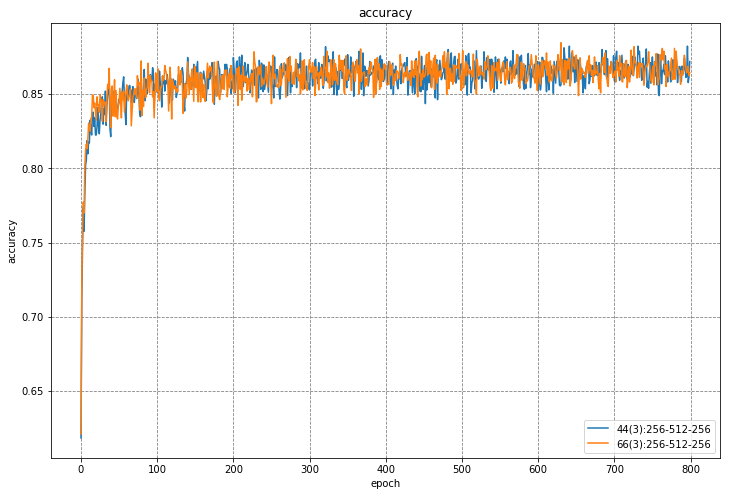

In [5]:
print('SYLLABLED LETTERS REPRESENTATION: Comparison of different convolutions.')
draw_plots(inputs_syllabled_letters, epoch_number=40, validation_data=True)

SYLLABLE REPRESENTATION: Comparison of different convolutions.


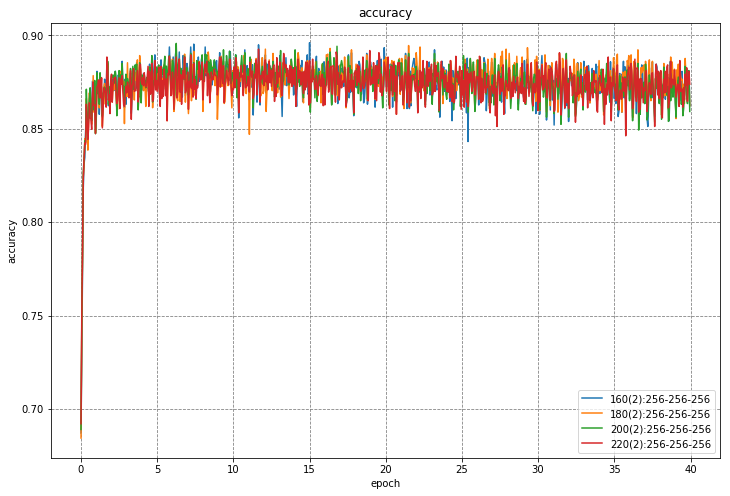

In [6]:
print('SYLLABLE REPRESENTATION: Comparison of different convolutions.')
draw_plots(inputs_syllables_different_convolution, epoch_number=40, validation_data=True)

SYLLABLE REPRESENTATION: Comparison of different convolutions.


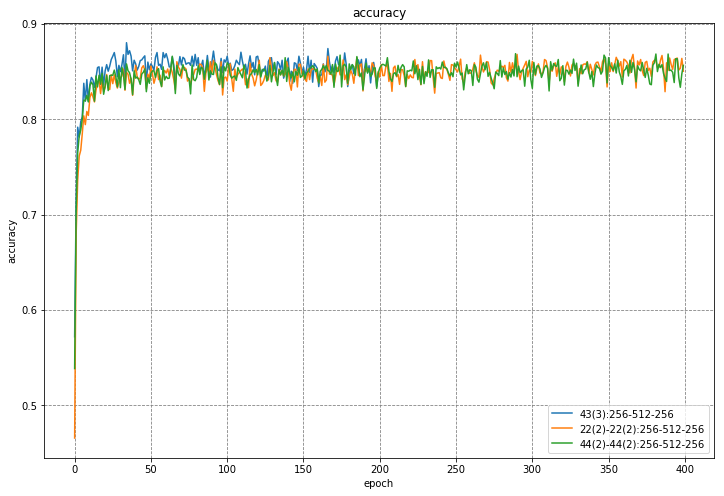

In [66]:
print('SYLLABLE REPRESENTATION: Comparison of different convolutions.')
draw_plots(inputs_syllables, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: Comparison of grand improvements.


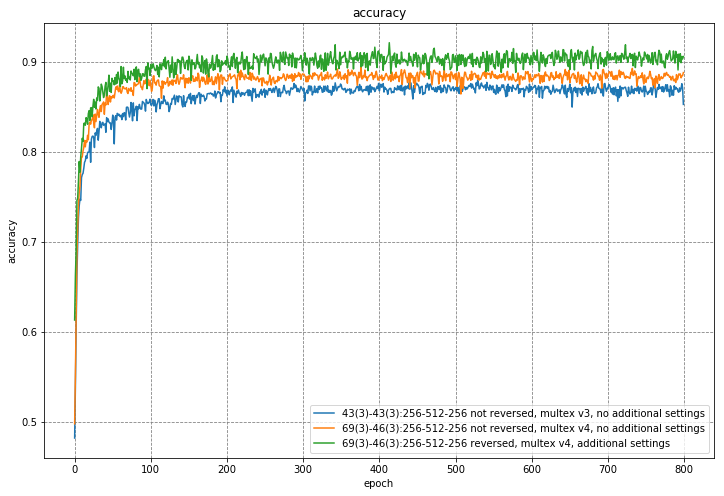

In [65]:
print('LETTER REPRESENTATION: Comparison of grand improvements.')
draw_plots(inputs_best_improvements, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: Testing added length.


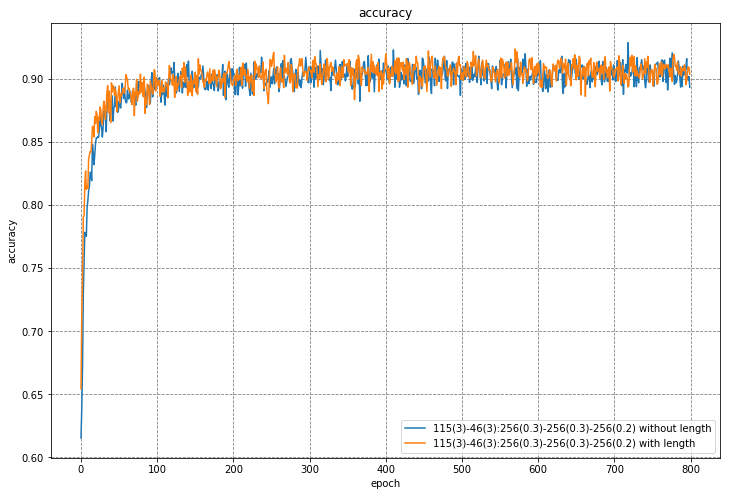

In [12]:
print('LETTER REPRESENTATION: Testing added length.')
draw_plots(inputs_testing_with_length, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: Testing different dropouts.


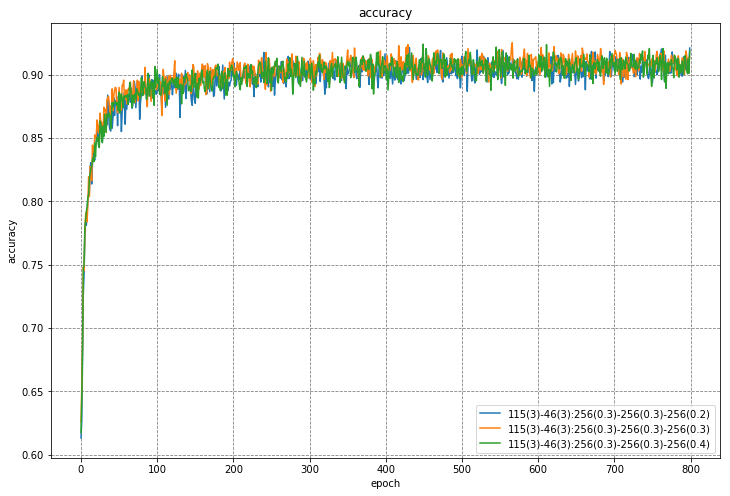

In [30]:
print('LETTER REPRESENTATION: Testing different dropouts.')
draw_plots(inputs_testing_different_dropouts, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: FC layers 256-512-256 vs 256-256-256.


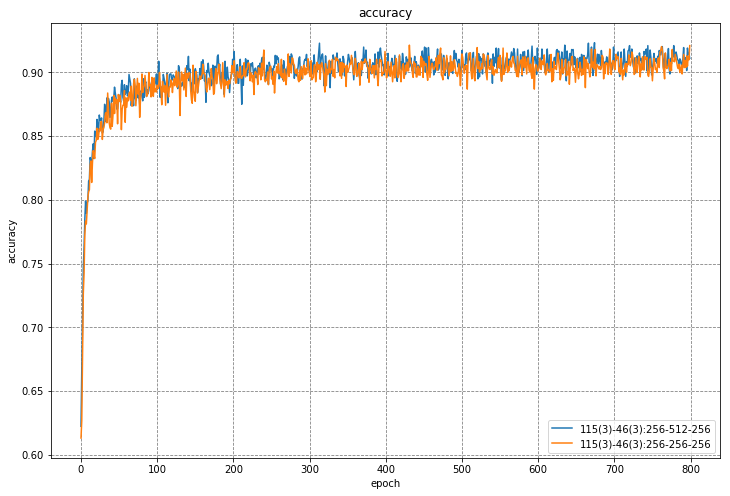

In [20]:
print('LETTER REPRESENTATION: FC layers 256-512-256 vs 256-256-256.')
draw_plots(inputs_testing_different_fc_layers, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: All fully connected layers are set to 256-512-256. Results are reversed, using MULTEXT v4, with other letter details.


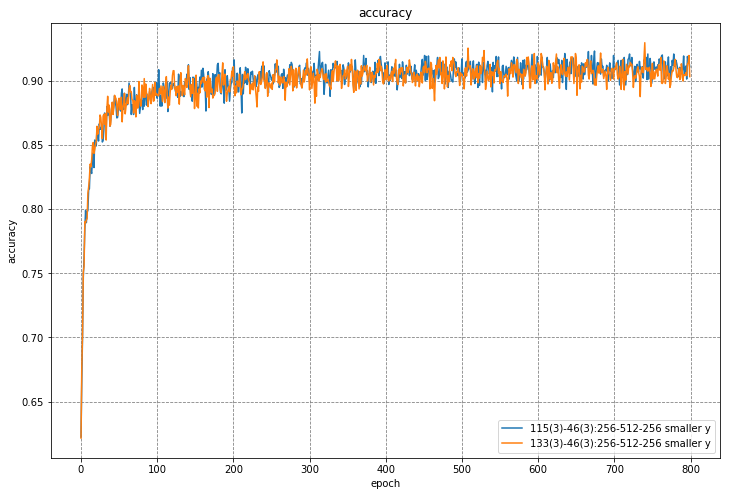

In [12]:
print('LETTER REPRESENTATION: All fully connected layers are set to 256-512-256. Results are reversed, using MULTEXT v4, with other letter details.')
draw_plots(inputs_best_convolution_2, epoch_number=40, validation_data=True)

LETTER REPRESENTATION: All fully connected layers are set to 256-512-256. Results are not reversed, using MULTEXT v4, with out other letter details.


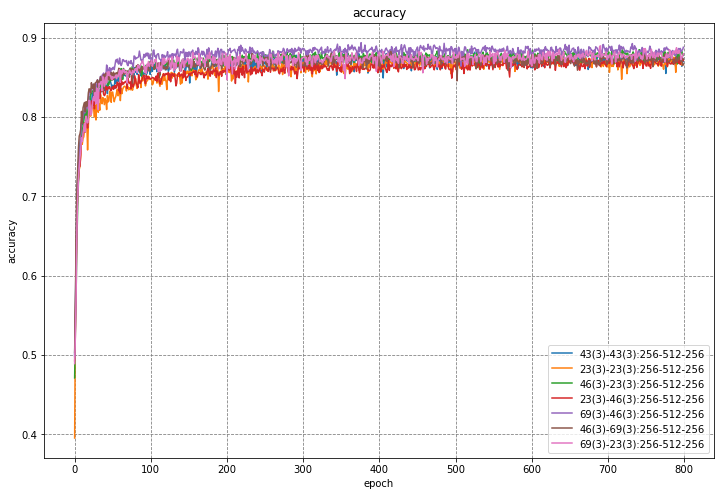

In [63]:
print('LETTER REPRESENTATION: All fully connected layers are set to 256-512-256. Results are not reversed, using MULTEXT v4, with out other letter details.')
draw_plots(inputs_best_convolution, epoch_number=50, validation_data=True)

LETTER REPRESENTATION: All convolutions are set to 43(3)-43(3). Results are not reversed, using MULTEXT v3, with out other letter details.


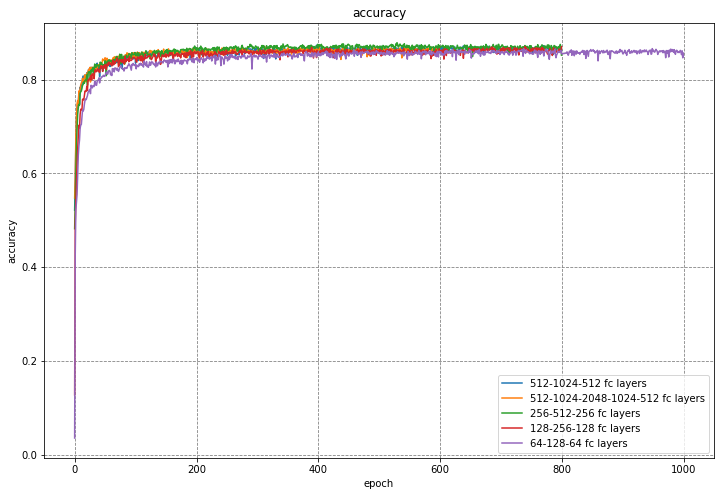

In [7]:
print('LETTER REPRESENTATION: All convolutions are set to 43(3)-43(3). Results are not reversed, using MULTEXT v3, with out other letter details.')
draw_plots(inputs_best_architecture, epoch_number=50, validation_data=True)

LETTER REPRESENTATION: All convolutions are set to 43(3)-43(3). Results are not reversed, using MULTEXT v3, with out other letter details.


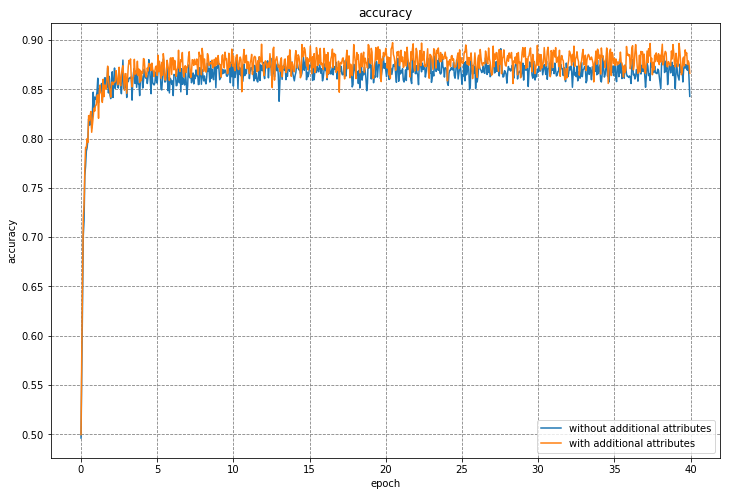

In [12]:
print('LETTER REPRESENTATION: All convolutions are set to 43(3)-43(3). Results are not reversed, using MULTEXT v3, with out other letter details.')
draw_plots(inputs_with_and_without_additional_attributes, epoch_number=40, validation_data=True)

In [4]:


def create_history_dict(inputs):
    history = []
    for inp in inputs:
        el = {}
        el['name'] = inp[0]
        el['description'] = inp[1]
        pickle_input = open(el['name'] + '_history.pkl', 'rb')
        el['history'] = pickle.load(pickle_input)
        history.append(el)
    return history

In [5]:
history[0]
for el in history:
    print('-----------------------------------------')
    print(el['description'])
    ordered = sorted(el['history']['val_actual_accuracy'], reverse=True)
    print(ordered[:10])
    ordered_indices = [el['history']['val_actual_accuracy'].index(a) for a in ordered]
    print(ordered_indices[:10])
#     print(el['history']['val_actual_accuracy'].index(max(el['history']['val_actual_accuracy'])))
    print('-----------------------------------------')

-----------------------------------------
512-1024-512 fc layers
[0.87391819091234479, 0.87335835757748181, 0.87286276741219337, 0.87229375648167695, 0.87218362533383509, 0.87202760620772568, 0.87177063352942796, 0.87174310074246752, 0.8716421471902791, 0.87158708161635812]
[397, 566, 770, 638, 617, 440, 695, 678, 611, 401]
-----------------------------------------
-----------------------------------------
512-1024-2048-1024-512 fc layers
[0.8708436963684254, 0.8706876772423161, 0.87028386303356242, 0.87005442314222525, 0.87001771275961126, 0.86980662805958098, 0.86959554335955069, 0.86932021548994598, 0.86927432751167844, 0.86912748598122269]
[556, 549, 465, 583, 492, 313, 557, 401, 381, 551]
-----------------------------------------
-----------------------------------------
256-512-256 fc layers
[0.8791769532217949, 0.87699268545626419, 0.87667146960839204, 0.87652462807793619, 0.87650627288662919, 0.87644202971705476, 0.8763135433779059, 0.87599232753003364, 0.87586384119088478, 0.8

In [3]:
def draw_plots(inputs, epoch_number=0, fake_epochs=20, validation_data=False, accuracy_only=True):
    history = create_history_dict(inputs)
    
    # plt.rcParams["figure.figsize"] = fig_size
    # plt.rcParams["figure.figsize"] = [48.0, 32.0]
    # plt.rcParams["figure.figsize"] = [24.0, 16.0]
    plt.rcParams["figure.figsize"] = [12.0, 8.0]
    # plt.rcParams["figure.figsize"] = [9.0, 6.0]
    # plt.rcParams["figure.figsize"] = [6.0, 4.0]
    if validation_data:
        for res in history:
            if epoch_number == 0 or epoch_number * fake_epochs > len(res['history']['val_actual_accuracy']):
                x = np.arange(0, len(res['history']['val_actual_accuracy'][:])/fake_epochs, 1.0/fake_epochs)
                plt.plot(x, res['history']['val_actual_accuracy'][:])
            else:
                x = np.arange(0, len(res['history']['val_actual_accuracy'][:epoch_number * fake_epochs])/fake_epochs, 1.0/fake_epochs)
                plt.plot(x, res['history']['val_actual_accuracy'][:epoch_number * fake_epochs])
                # print(res['history']['val_actual_accuracy'][:epoch_number * fake_epochs])
        plt.title('accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        legend = []
        for res in history:
            legend.append(res['description'])
        plt.legend(legend, loc='lower right')

        # draws gray dashed lines below
        ax = plt.subplot(111)
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        # # major ticks every 20, minor ticks every 5                                      
        # major_ticks = np.arange(0, 101, 20)                                              
        # minor_ticks = np.arange(0, 101, 5)                                               

        # ax.set_xticks(major_ticks)                                                       
        # ax.set_xticks(minor_ticks, minor=True)                                           
        # ax.set_yticks(major_ticks)                                                       
        # ax.set_yticks(minor_ticks, minor=True)                                           

        # # and a corresponding grid                                                       

        # ax.grid(which='minor', alpha=0.2)                                                
        # ax.grid(which='major', alpha=0.5)


        # fig_size = plt.rcParams["figure.figsize"]


        plt.show()

        if not accuracy_only:
            # summarize history for loss
            for res in history:
                if epoch_number == 0 or epoch_number * fake_epochs > len(res['history']['val_loss']):
                    x = np.arange(0, len(res['history']['val_loss'][:])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_loss'])
                else:
                    x = np.arange(0, len(res['history']['val_loss'][:epoch_number * fake_epochs])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_loss'][:epoch_number * fake_epochs])
            plt.title('loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            for res in history:
                legend.append(res['description'])
            plt.legend(legend, loc='upper left')

            # draws gray dashed lines below
            ax = plt.subplot(111)
            ax.set_axisbelow(True)
            ax.yaxis.grid(color='gray', linestyle='dashed')
            ax.xaxis.grid(color='gray', linestyle='dashed')
            plt.show()

            # summarize history for loss and accuracy
            for res in history:
                if epoch_number == 0 or epoch_number * fake_epochs > len(res['history']['val_loss']):
                    x = np.arange(0, len(res['history']['val_loss'][:])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_loss'])
                else:
                    x = np.arange(0, len(res['history']['val_loss'][:epoch_number * fake_epochs])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_loss'][:epoch_number * fake_epochs])
            for res in history:
                if epoch_number == 0 or epoch_number * fake_epochs > len(res['history']['val_actual_accuracy']):
                    x = np.arange(0, len(res['history']['val_actual_accuracy'][:])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_actual_accuracy'])
                else:
                    x = np.arange(0, len(res['history']['val_actual_accuracy'][:epoch_number * fake_epochs])/fake_epochs, 1.0/fake_epochs)
                    plt.plot(x, res['history']['val_actual_accuracy'][:epoch_number * fake_epochs])
            plt.title('accuracy and loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            for res in history:
                legend.append(res['description'])
            plt.legend(legend, loc='center')

            # draws gray dashed lines below
            ax = plt.subplot(111)
            ax.set_axisbelow(True)
            ax.yaxis.grid(color='gray', linestyle='dashed')
            ax.xaxis.grid(color='gray', linestyle='dashed')
            plt.show()

    else:
        # graphs only per model
        plt.plot(res['history']['actual_accuracy'])
        plt.plot(res['history']['val_actual_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='lower right')

        # draws gray dashed lines below
        ax = plt.subplot(111)
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        plt.show()
        # summarize history for loss
        plt.plot(res['history']['loss'])
        plt.plot(res['history']['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')

        # draws gray dashed lines below
        ax = plt.subplot(111)
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        plt.show()

In [3]:
import sys
sys.path.insert(0, '../../../')
from prepare_data import *
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
old_feature_dictionary = create_feature_dictionary(content)

Using Theano backend.


NameError: name 'create_dict' is not defined

In [4]:
%run ../../../prepare_data.py
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
print(len(dictionary))
print(dictionary)

NameError: name 'create_dict' is not defined